## Machine Learning
Assignment 1 -
DSIT UOA

##Problem 1

*Importing required modules*

In [11]:
import matplotlib.pyplot as plt 
import numpy as np 

###1.1

###1.2

###1.3

Function to generate our Input & "Experimental" Results in arrays

In [12]:
def x_y_actual(t0, t1, t2, t3, t5, r_step, r__start, r__end):

    x = np.linspace(r__start, r__end, num= N)             #input range [0,2] including 2 
    noise = np.random.normal(mu,sigma, size=(N,))         #adding random noise of input data
    y = t5*x**5 + t3*x**3 + t2*x**2 + t1*x + t0 + noise 
    y_true  = t5*x**5 + t3*x**3 + t2*x**2 + t1*x + t0 

    return(x, y, y_true)

*Actual polynomial model parameters and Sample range*


In [13]:
#polynomial weights
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

#Input data range
r_start = 0
r_end = 2
N  = 20
step = (r_end - r_start) / N

mu, sigma = 0, 0.1    # mean and standard deviation of Input noise

*Assign values to {x, y} set*

In [14]:
x, y , y_true = x_y_actual(th0, th1, th2, th3, th5, step, r_start, r_end)

Predict Results -->
*Compute parameters from Input data of the 5th degree polynomial model with Ridge Regression*

*Parameters*

In [15]:
poly_deg = 5
lamda = 0.008   #Optimal value is selected by MSE least value, compputed below

*Build vector **X** ([1  x  x^2  x^3  x^5] in range [0,2] of N points to use for trainning*

In [16]:
Q_train = np.zeros(shape = (N,poly_deg+1))
Q_train[:,0] = 1
for i in range(1,poly_deg+1):
    if i!=4:         #we do not want term x^4 to contribute
      Q_train[:,i] = np.power(x,i).reshape((N,))   #[x, x^2, x^3, x^5] of input data x ∈ [0,2]

*Parameter "Θ" Calculation*

In [17]:
#closed form solution for theta = ((X.T * X + λΙ)^-1) * Χ.Τ * Υ
theta = np.linalg.pinv((Q_train.T.dot(Q_train) + lamda*np.eye(poly_deg+1))).dot(Q_train.T).dot(y)
theta

array([ 0.22694041, -1.01817743,  0.64436874,  0.9842359 ,  0.        ,
       -0.24210408])

*Check MSE behaviour vs different values 
of lamda*

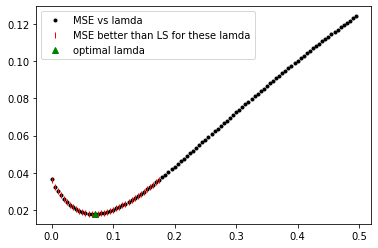

In [62]:
import math

sample_shp = 100

# Initialize arrays
mse = np.zeros((sample_shp))

# Define lamda values range & density
l_str = 0
l_end = 0.5
step_l = (l_end - l_str) / sample_shp
lamd_range = np.arange(l_str ,l_end, step_l)  
i,m =0, 0
for lamda in lamd_range:

 #closed form solution for theta = ((X.T * X + λΙ)^-1) * Χ.Τ * Υ
  theta = np.linalg.pinv((Q_train.T.dot(Q_train) + lamda*np.eye(poly_deg+1))).dot(Q_train.T).dot(y)

  prev = 0 
  for k in range(len(y)):
    
    mse[i] = prev + pow(Q_train.dot(theta)[k] - y_true[k],2)  
    prev =  mse[i]

  if mse[i] < mse[0]:
      mse_better[i] = mse[i]


  i = i+1

opt = np.argmin(mse)    #index of optimal lamda (least value of MSE)
mse_better[ mse_better==0 ] = np.nan

# Plot to see the dependency
plt.plot(lamd_range, mse, 'k.',linewidth=0, label='MSE vs lamda')
plt.plot(lamd_range, mse_better , 'r|',linewidth=0, label='MSE better than LS for these lamda')
plt.plot(lamd_range[opt], mse[opt], 'g^',linewidth=0, label='optimal lamda')
plt.legend()
plt.show()


Optimal Lamda

In [63]:
found =  mse[opt] - min(mse)
print(found)
print("Optimal lamda = ", str(lamd_range[opt])," & Least MSE = ", str(mse[opt]))

0.0
Optimal lamda =  0.07  & Least MSE =  0.017915049355909554


###1.4

###1.5

###1.6

##Problem 2

###2.1

###2.2

####2.2.a

####2.2.b

####2.2.c

####2.2.d

###2.3

###2.4